In [214]:
import matplotlib.pyplot as plt
import numpy as np
import wave
from scipy import signal as sgn
import IPython.display as ipd


# Setar diretório e arquivo
caminho = 'C:\\Users\\jeanm\\Documents\\Filter-Project\\Data\\'
arquivo_audio1 = "Voz01_16KHz"
arquivo_audio2 = "Voz02_16KHz"
spf1 = wave.open(caminho + arquivo_audio1 + '.wav', 'rb')
ipd.Audio(caminho + arquivo_audio1 + '.wav')  # Ouvir Audio

In [215]:
spf2 = wave.open(caminho + arquivo_audio2 + '.wav', 'rb')
ipd.Audio(caminho + arquivo_audio2 + '.wav')  # Ouvir audio

In [216]:
# Parâmetros Gerais da Simulação
Fs1 = 16000  # Frequência de Amostragem
SimTime = 8  # Tempo de Simulação (s)
T = 1/Fs1  # Período de Amostragem
n1 = np.arange(0, SimTime, T)  # Array de Amostras
sz = Fs1 * SimTime  # Taxa do Projeto (Hz)
signal1 = np.frombuffer(spf1.readframes(sz), dtype=np.int16)  # Carregar sinal 1
signal2 = np.frombuffer(spf2.readframes(sz), dtype=np.int16)  # Carregar sinal 2

Text(0.5, 1.0, 'Sinal Modulante 1')

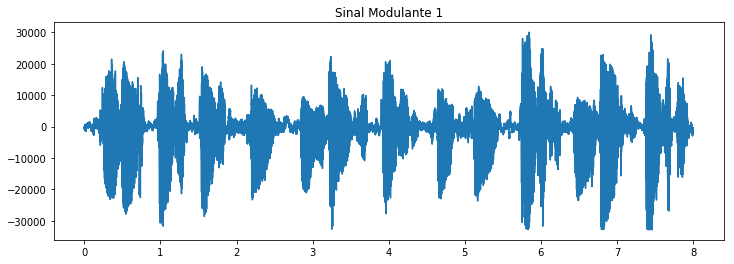

In [217]:
# Plotar sinal de audio 1
signal1 = sgn.resample(signal1, 128000)
plt.figure(figsize=(12, 4))
plt.plot(n1, signal1)
plt.title('Sinal Modulante 1')

Text(0.5, 1.0, 'Sinal Modulante 2')

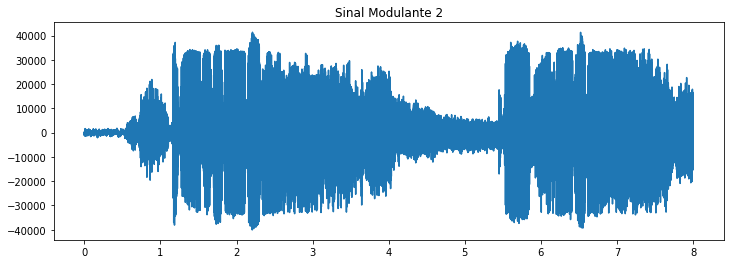

In [218]:
# Plotar sinal de audio 2
signal2 = sgn.resample(signal2, 128000)
plt.figure(figsize=(12, 4))
plt.plot(n1, signal2)
plt.title('Sinal Modulante 2')

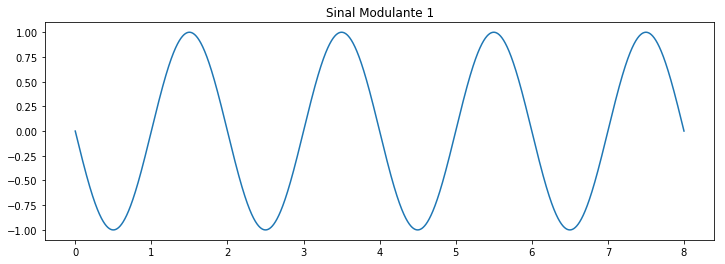

In [219]:
# Criação do sinal Modulante (Somente para testes)
Fm = 0.5  # Frequência do Modulante
Am = 1  # Amplitude do Modulante
phm = np.pi/2  # Fase da Modulante
m = Am*np.cos(2*np.pi*Fm*n1 + phm)
plt.figure(figsize=(12, 4))
plt.title('Sinal Modulante 1')
plt.plot(n1, m)

In [252]:
# Downsampling do Sinal 1
M = 2
signal1 = sgn.decimate(signal1, M)  # Dizimação de parte do Sinal 1

# Downsampling do Sinal 2
M = 2  # Fator de dizimação
signal2 = sgn.decimate(signal2, M)  # Dizimação de parte do Sinal 2

In [253]:
# Ajuste no Número de Amostras
Fs2 = 8000
n2 = np.arange(0, SimTime, 1/Fs2)  # Array de Amostras Após o Downsampling

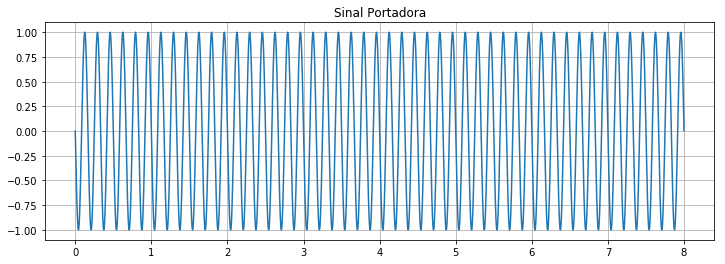

In [254]:
# Criação do Sinal Portadora de Transmissão
Fc = 6  # Frequência da Portadora
Ac = 1  # Amplitude da Portadora
phc = np.pi/2
carrier = Ac*np.cos(2*np.pi*Fc*n2 + phc)
plt.figure(figsize=(12, 4))
plt.title('Sinal Portadora')
plt.plot(n2, carrier)
plt.grid()

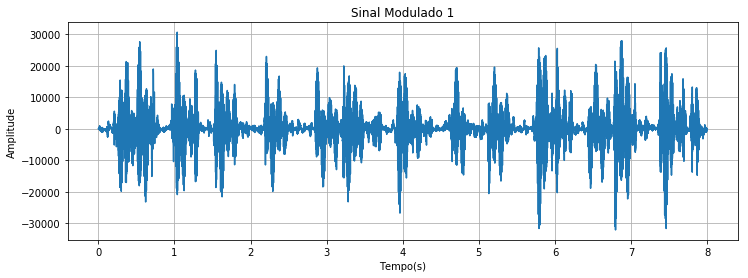

In [255]:
# Modulação Sinal de Audio 1 com Portadora(Carrier)
s1 = carrier * (1 + signal1/Ac)
plt.figure(figsize=(12, 4))
plt.plot(n2, s1)
plt.title('Sinal Modulado 1')
plt.xlabel('Tempo(s)')
plt.ylabel('Amplitude')
plt.grid()

Text(0.5, 0, 'Frequência (Hz)')

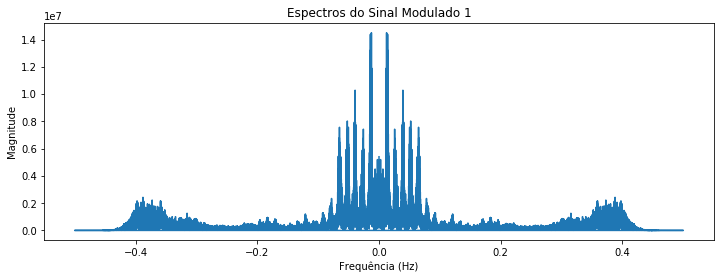

In [256]:
#  Espectros Sinal Modulado 1
spectrum = np.fft.fft(s1)
freqs = np.fft.fftfreq(len(spectrum))
magnitude = np.abs(spectrum)    # Amplitude do Sinal
phase = np.angle(spectrum)  # Fase do Sinal
plt.figure(figsize=(12, 4))
plt.plot(freqs, magnitude)
plt.title('Espectros do Sinal Modulado 1')
plt.ylabel("Magnitude")
plt.xlabel('Frequência (Hz)')

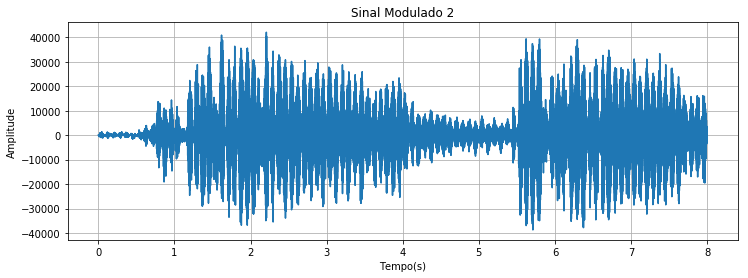

In [257]:
# Modulação Sinal de Audio 2 com Portadora(Carrier)
s2 = carrier * (1 + signal2/Ac)
plt.figure(figsize=(12, 4))
plt.plot(n2, s2)
plt.title('Sinal Modulado 2')
plt.xlabel('Tempo(s)')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

Text(0.5, 0, 'Frequência (Hz)')

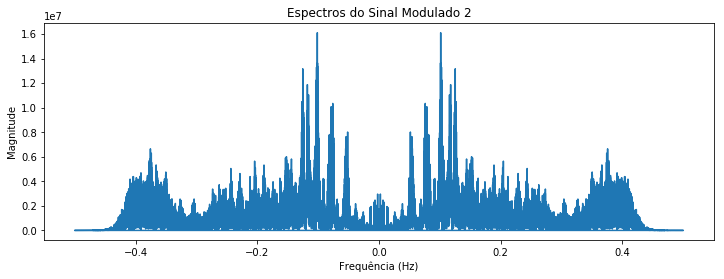

In [258]:
#  Espectros Sinal Modulado 2
spectrum = np.fft.fft(s2)
freqs = np.fft.fftfreq(len(spectrum))
magnitude = np.abs(spectrum)    # Amplitude do Sinal
phase = np.angle(spectrum)  # Fase do Sinal
plt.figure(figsize=(12, 4))
plt.plot(freqs, magnitude)
plt.title('Espectros do Sinal Modulado 2')
plt.ylabel("Magnitude")
plt.xlabel('Frequência (Hz)')

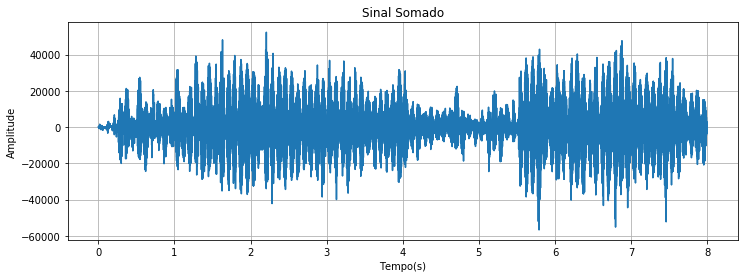

In [259]:
# Somatório dos Sinais Modulados
sinal_somado = s1 + s2
plt.figure(figsize=(12, 4))
plt.plot(n2, sinal_somado)
plt.title('Sinal Somado')
plt.xlabel('Tempo(s)')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

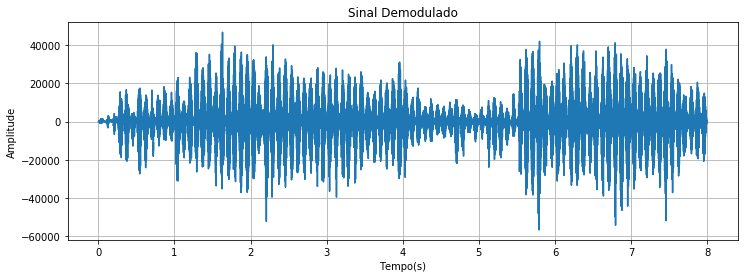

In [260]:
# Demodulação do sinal Somado
h1 = sinal_somado * np.cos(2*np.pi*Fc*n2 + np.pi/2)
plt.figure(figsize=(12, 4))
plt.plot(n2, h1)
plt.title('Sinal Demodulado')
plt.xlabel('Tempo(s)')
plt.ylabel('Amplitude')
plt.grid()

Text(0.5, 0, 'Frequência (Hz)')

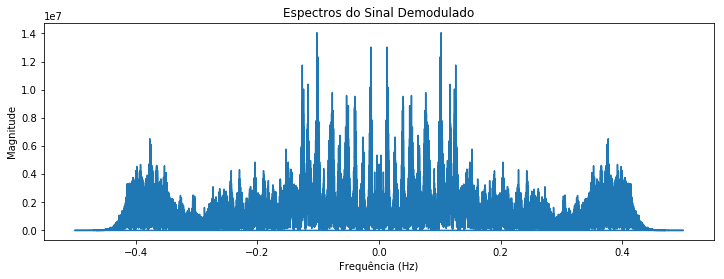

In [261]:
#  Espectros Sinal Demodulado
spectrum = np.fft.fft(h1)
freqs = np.fft.fftfreq(len(spectrum))
magnitude = np.abs(spectrum)    # Amplitude do Sinal
plt.figure(figsize=(12, 4))
plt.plot(freqs, magnitude)
plt.title('Espectros do Sinal Demodulado')
plt.ylabel("Magnitude")
plt.xlabel('Frequência (Hz)')

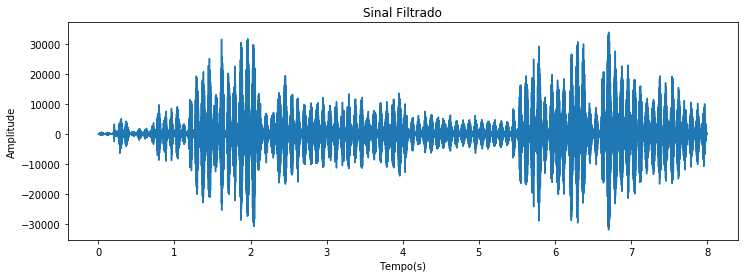

In [31]:
# Filtro Passa-Faixa
gpass= 3 # Ripple na banda de passagem
gstop= 40 # Atenuação na banda de rejeição
fp1=4000 # Frequências de corte
fp2=7000
fs1=1500; # Frequências de rejeição
fs2=9500
fn = Fs2/2 # Frequência de Nyquist
Wp1=fp1/fn # Frequências normalizada
Wp2=fp2/fn
Ws1=fs1/fn
Ws2=fs2/fn

order, Wc = sgn.buttord([wp1, wp2], [ws1, ws2], gpass, gstop) # Retorna ordem e frequência de corte
b,a = sgn.butter(order, Wc, 'bandpass')
y = sgn.filtfilt(b,a,h1)

plt.figure(figsize=(12, 4))
plt.title('Sinal Filtrado')
plt.xlabel('Tempo(s)')
plt.ylabel('Amplitude')
plt.plot(n2, y)

Text(0, 0.5, 'Amplitude')

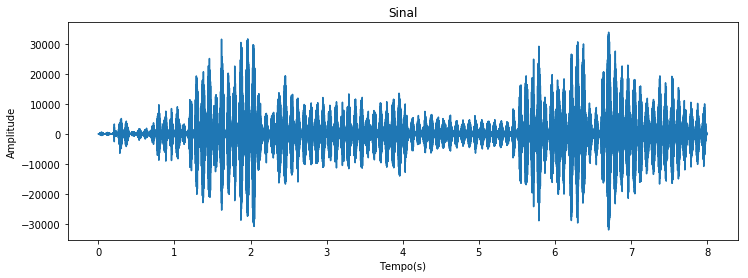

In [263]:
# Upsampling do Sinal
L = 2 
x = sgn.upfirdn([1], y, L)
plt.figure(figsize=(12, 4))
plt.plot(n1, x)
plt.title('Sinal')
plt.xlabel('Tempo(s)')
plt.ylabel('Amplitude')

In [247]:
ipd.Audio(filtered_signal, rate=sr)

NameError: name 'sr' is not defined